In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the Datasets
applications = pd.read_csv(r"C:\Users\HP\Desktop\UPGRAD\python\EDA\Credit EDA Assignment\application_data.csv")
prev_applications = pd.read_csv(r'C:\Users\HP\Desktop\UPGRAD\python\EDA\Credit EDA Assignment\previous_application.csv')

In [3]:
## inspecting the data

In [4]:
applications.shape

(307511, 122)

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
applications.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
applications.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
# percent of null values in columns
round(100*(applications.isnull().sum()/applications.index.size), 2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [9]:
# number of columns having 50% or more empty rows
empty = round(100*(applications.isnull().sum()/applications.index.size), 2) >=50.00
empty.value_counts()

False    81
True     41
dtype: int64

In [10]:
#dropping these 41 columns
drop_columns = list(applications.columns[empty])
applications.drop(drop_columns, axis=1, inplace=True)

In [11]:
#rechecking the size
applications.shape

(307511, 81)

In [12]:
# again, percent of null values in columns
round(100*(applications.isnull().sum()/applications.index.size), 2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

In [13]:
#dropping columns not necessary from analysis perspective having null values between 30%-50%.
drop_list = ["YEARS_BEGINEXPLUATATION_AVG", "FLOORSMAX_AVG", "YEARS_BEGINEXPLUATATION_MODE", "FLOORSMAX_MODE", "YEARS_BEGINEXPLUATATION_MEDI","FLOORSMAX_MEDI", "TOTALAREA_MODE", "EMERGENCYSTATE_MODE", "EXT_SOURCE_3"]
#we have retained occupation_type as it is necessary for analysis and business purpose
applications.drop(drop_list, axis=1, inplace=True)

In [14]:
applications.shape

(307511, 72)

In [15]:
# again, percent of null values in columns
round(100*(applications.isnull().sum()/applications.index.size), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

In [16]:
#Checking the data types of the columns

In [17]:
#1 Float Type
applications.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [18]:
#2 Object Type
applications.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [19]:
#2 Int Type
applications.select_dtypes(include='int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [20]:
#Outlier check and imputation of columns

##Column 1 - AMT_GOODS_PRICE

In [21]:
applications['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

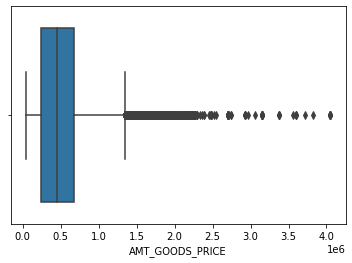

In [22]:
#Since it is a continuous variable, checking for outliers.
sns.boxplot(applications['AMT_GOODS_PRICE'])
plt.show()

In [23]:
#In case of continuous variable with outliers, we will use median.
applications['AMT_GOODS_PRICE']=applications['AMT_GOODS_PRICE'].fillna(applications['AMT_GOODS_PRICE'].median())

In [24]:
##Column 2 - NAME_TYPE_SUITE
applications['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [25]:
#Since it is categorical variable, we can either drop the rows, use mode to impute the values or create another category.
applications['NAME_TYPE_SUITE']=applications['NAME_TYPE_SUITE'].fillna(applications['NAME_TYPE_SUITE'].mode()[0])

In [26]:
##Column 3 - OCCUPATION_TYPE
applications['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [27]:
#Since it is categorical variable, we can either drop the rows, use mode to impute the values or create another category.
applications['OCCUPATION_TYPE']=applications['OCCUPATION_TYPE'].fillna('Others')

In [28]:
##Column 4 - EXT_SOURCE_2
applications['EXT_SOURCE_2'].value_counts()

2.858979e-01    721
2.622584e-01    417
2.652563e-01    343
1.596792e-01    322
2.653117e-01    306
2.665198e-01    244
2.631436e-01    243
1.621446e-01    238
1.621921e-01    234
1.631870e-01    184
1.604053e-01    173
1.915259e-01    169
2.453496e-01    167
3.542247e-01    149
1.942664e-01    140
1.923161e-01    131
3.572820e-01    129
1.942151e-01    127
1.953538e-01    123
3.551256e-01    113
3.411229e-01    110
2.556162e-01     92
3.585685e-01     90
2.930897e-01     85
2.620553e-01     84
3.441915e-01     84
3.573422e-01     81
2.547600e-01     80
3.420278e-01     73
2.961436e-01     72
2.007754e-01     71
3.442507e-01     69
1.542654e-01     67
3.454859e-01     67
2.290030e-01     67
2.962028e-01     67
2.746463e-01     66
2.598076e-01     64
2.974306e-01     64
3.102603e-01     61
2.629359e-01     61
2.533716e-01     59
1.548483e-01     59
2.650476e-01     59
2.563408e-01     58
5.806869e-01     57
2.632411e-01     56
6.019534e-01     55
1.535706e-01     55
6.156443e-01     54


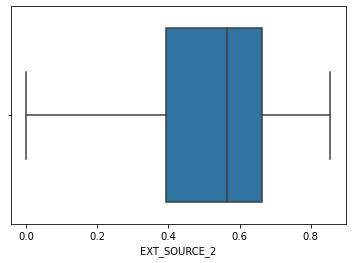

In [29]:
#Since it is a continuous variable, checking for outliers.
sns.boxplot(applications['EXT_SOURCE_2'])
plt.show()

In [30]:
#In case of continuous variable with no outliers,we will use mean.
applications['EXT_SOURCE_2']=applications['EXT_SOURCE_2'].fillna(applications['EXT_SOURCE_2'].mean())

In [31]:
##Column 4 - OBS_30_CNT_SOCIAL_CIRCLE
applications['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
348.0         1
28.0          1
47.0          1
29.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

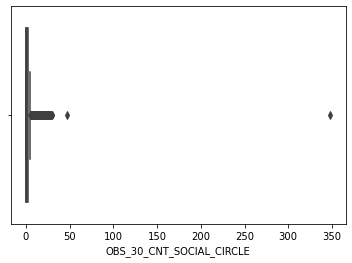

In [32]:
#Since it is a continuous variable, checking for outliers.
sns.boxplot(applications['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [33]:
#This is a continuous variable, however, the extreme value cannot be considered as an outlier as it is necessary, therefore dropping the missing values.
applications['OBS_30_CNT_SOCIAL_CIRCLE'].dropna(axis=0, inplace=True)

In [34]:
#repeating the same for DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE
applications['DEF_30_CNT_SOCIAL_CIRCLE'].dropna(axis=0, inplace=True)
applications['OBS_60_CNT_SOCIAL_CIRCLE'].dropna(axis=0, inplace=True)
applications['DEF_60_CNT_SOCIAL_CIRCLE'].dropna(axis=0, inplace=True)

In [35]:
##Column 5 - AMT_REQ_CREDIT_BUREAU_HOUR
applications['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [36]:
#Since it is categorical variable, we can either drop the rows, use mode to impute the values or create another category.
applications['AMT_REQ_CREDIT_BUREAU_HOUR']=applications['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna('NA')

In [37]:
#repeating the same for AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR
applications['AMT_REQ_CREDIT_BUREAU_DAY']=applications['AMT_REQ_CREDIT_BUREAU_DAY'].fillna('NA')
applications['AMT_REQ_CREDIT_BUREAU_WEEK']=applications['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna('NA')
applications['AMT_REQ_CREDIT_BUREAU_MON']=applications['AMT_REQ_CREDIT_BUREAU_MON'].fillna('NA')
applications['AMT_REQ_CREDIT_BUREAU_QRT']=applications['AMT_REQ_CREDIT_BUREAU_QRT'].fillna('NA')
applications['AMT_REQ_CREDIT_BUREAU_YEAR']=applications['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna('NA')

In [38]:
applications.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [39]:
#Making Gender more readable
applications['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [40]:
applications['CODE_GENDER'].replace(['M','F','XNA'],['Male','Female','Other'],inplace=True)

In [41]:
#checking for Imbalance
round(applications['TARGET'].value_counts(normalize=True)*100,2)

0    91.93
1     8.07
Name: TARGET, dtype: float64

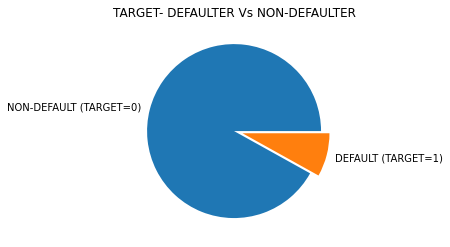

In [42]:
plt.pie(applications['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.1))
plt.title('TARGET- DEFAULTER Vs NON-DEFAULTER')
plt.show()

In [43]:
# From the remaining columns about 25 are selected based on their description and relevance with problem statement for further analysis
Columns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_CREDIT','AMT_INCOME_TOTAL','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [44]:
applications_final = applications[Columns]

In [45]:
applications_final.shape

(307511, 26)

In [46]:
applications_final.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  AMT_CREDIT  \
0      100002       1        Male            N               Y    406597.5   
1      100003       0      Female            N               N   1293502.5   
2      100004       0        Male            Y               Y    135000.0   
3      100006       0      Female            N               Y    312682.5   
4      100007       0        Male            N               Y    513000.0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          202500.0          Working  Secondary / secondary special   
1          270000.0    State servant               Higher education   
2           67500.0          Working  Secondary / secondary special   
3          135000.0          Working  Secondary / secondary special   
4          121500.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   DAYS_REGISTRATION  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -3648.0           0        Laborers              1.0   
1            -1186.0           0      Core staff              2.0   
2            -4260.0           0        Laborers              1.0   
3            -9833.0           0        Laborers              2.0   
4            -4311.0           0      Core staff              1.0   

   REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                            2  Business Entity Type 3   
1                            1                  School   
2                            2              Government   
3                            2  Business Entity Type 3   
4                            2                Religion   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_MON  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                        NA                        NA   
4                       0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0                       0.0         Cash loans      24700.5   
1                       0.0         Cash loans      35698.5   
2                       0.0    Revolving loans       6750.0   
3                        NA         Cash loans      29686.5   
4                       0.0         Cash loans      21865.5   

   REGION_RATING_CLIENT  AMT_GOODS_PRICE  
0                     2         351000.0  
1                     1        1129500.0  
2                     2         135000.0  
3                     2         297000.0  
4                     2         513000.0

In [47]:
#analysing DAYS_EMPLOYED and DAYS_BIRTH
applications_final['DAYS_EMPLOYED']=abs(applications_final['DAYS_EMPLOYED'])
applications_final['DAYS_BIRTH']=abs(applications_final['DAYS_BIRTH'])

In [48]:
drop_rows = applications_final[ applications_final['DAYS_EMPLOYED'] >= applications_final['DAYS_BIRTH'] ].index

In [49]:
applications_final.drop(drop_rows, inplace=True)

In [50]:
applications_final.shape

(252137, 26)

In [51]:
applications_final.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  AMT_CREDIT  \
0      100002       1        Male            N               Y    406597.5   
1      100003       0      Female            N               N   1293502.5   
2      100004       0        Male            Y               Y    135000.0   
3      100006       0      Female            N               Y    312682.5   
4      100007       0        Male            N               Y    513000.0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          202500.0          Working  Secondary / secondary special   
1          270000.0    State servant               Higher education   
2           67500.0          Working  Secondary / secondary special   
3          135000.0          Working  Secondary / secondary special   
4          121500.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment        9461            637   
1               Married  House / apartment       16765           1188   
2  Single / not married  House / apartment       19046            225   
3        Civil marriage  House / apartment       19005           3039   
4  Single / not married  House / apartment       19932           3038   

   DAYS_REGISTRATION  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -3648.0           0        Laborers              1.0   
1            -1186.0           0      Core staff              2.0   
2            -4260.0           0        Laborers              1.0   
3            -9833.0           0        Laborers              2.0   
4            -4311.0           0      Core staff              1.0   

   REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                            2  Business Entity Type 3   
1                            1                  School   
2                            2              Government   
3                            2  Business Entity Type 3   
4                            2                Religion   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_MON  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                        NA                        NA   
4                       0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0                       0.0         Cash loans      24700.5   
1                       0.0         Cash loans      35698.5   
2                       0.0    Revolving loans       6750.0   
3                        NA         Cash loans      29686.5   
4                       0.0         Cash loans      21865.5   

   REGION_RATING_CLIENT  AMT_GOODS_PRICE  
0                     2         351000.0  
1                     1        1129500.0  
2                     2         135000.0  
3                     2         297000.0  
4                     2         513000.0

In [52]:
#Binning variables

In [53]:
# INCOME
applications_final['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        90000.0
0.3       121500.0
0.6       180000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [54]:
##Creating A new categorical variable
applications_final['INCOME_GROUP']=pd.qcut(applications_final['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1], labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [55]:
# AGE_GROUP
applications_final['DAYS_BIRTH'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10051.0
0.3    12365.0
0.6    15679.0
0.8    18267.8
1.0    25200.0
Name: DAYS_BIRTH, dtype: float64

In [56]:
##Creating a column AGE using DAYS_BIRTH
applications_final['AGE']=applications_final['DAYS_BIRTH']//365

In [57]:
applications_final['AGE'].describe()

count    252137.000000
mean         39.963155
std          10.033179
min          20.000000
25%          32.000000
50%          39.000000
75%          48.000000
max          69.000000
Name: AGE, dtype: float64

In [58]:
## Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
applications_final['AGE_GROUP'] = pd.cut(applications_final['AGE'],bins=np.arange(20,71,5))

In [59]:
applications_final.shape

(252137, 29)

In [60]:
#Splitting the data into two parts.
app0=applications_final[applications_final.TARGET==0]    # Dataframe with all the data related to non-defaulters
app1=applications_final[applications_final.TARGET==1]    # Dataframe with all the data related to defaulters

In [61]:
# function to count plot for categorical variables
def cat_plot(cat):

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))  
    sns.countplot(x=cat, data=app0, ax=ax1)
    ax1.set_title(f'Distribution of {cat} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(app0))*100), (p.get_x()+0.1, p.get_height()+50))
    
    sns.countplot(x=cat, data=app1, ax=ax2)
    ax2.set_title(f'Distribution of {cat} for Defaulters',fontsize=15)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(app1))*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()

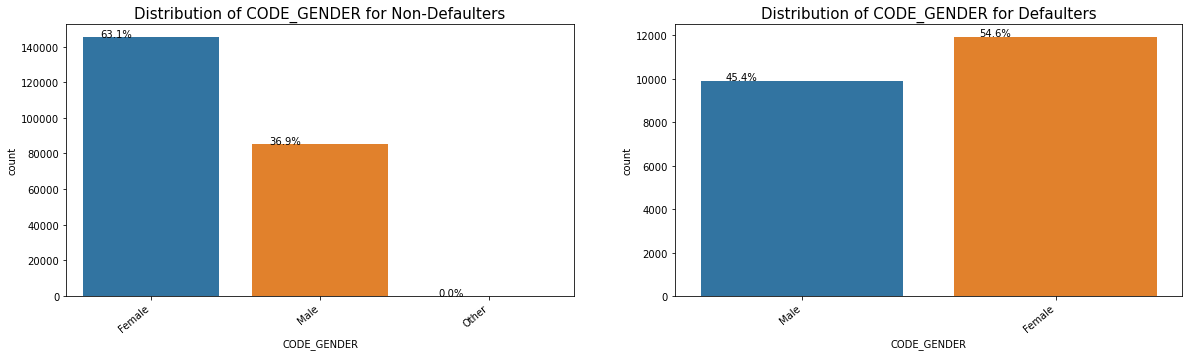

In [62]:
cat_plot('CODE_GENDER')

- We can clearly see that the female applicants is more than male applicants
- Also, we can see that female defaulters is more than male defaulters probably because of more number of applications.
- The rate of default of females is lower than the rate of default of males

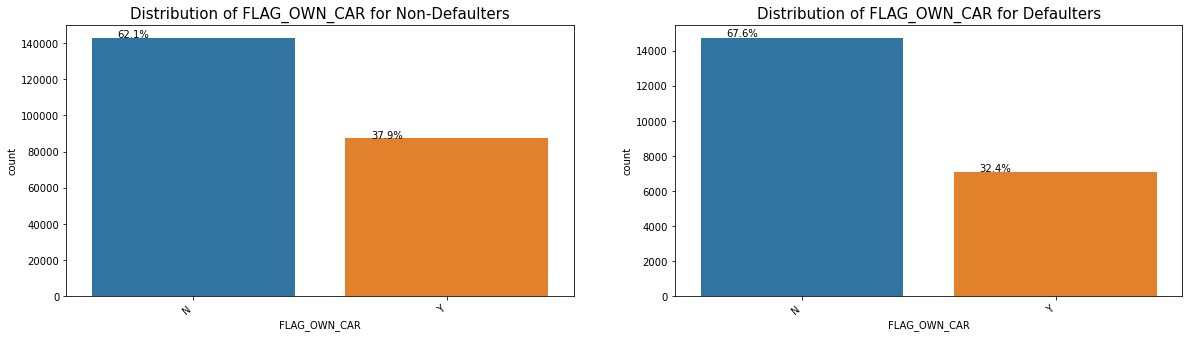

In [63]:
cat_plot('FLAG_OWN_CAR')

- We can clearly see that the majority of applicants donot own a car
- Also, we can see that people without car default more often probably because of more number of applicants
- However, the rate of default is simillar for both the categories
- Hence, default on loan doesnot depend on whether the person owns a car or not

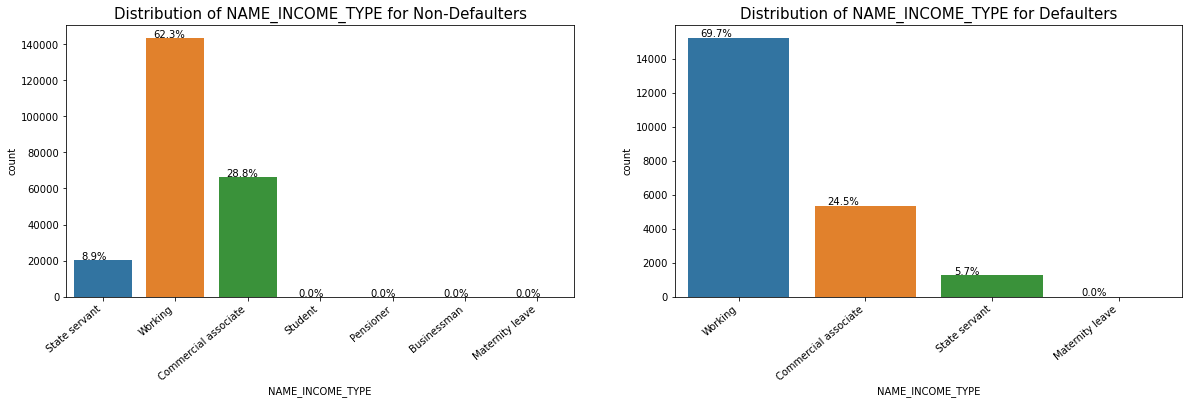

In [64]:
cat_plot('NAME_INCOME_TYPE')

- We can clearly see that Businessmen and Students donot default 
- Most of the loans are taken by Working Class and hence the maximum number of defaults
- Therefore, risk free target audience will be students and Businessmen

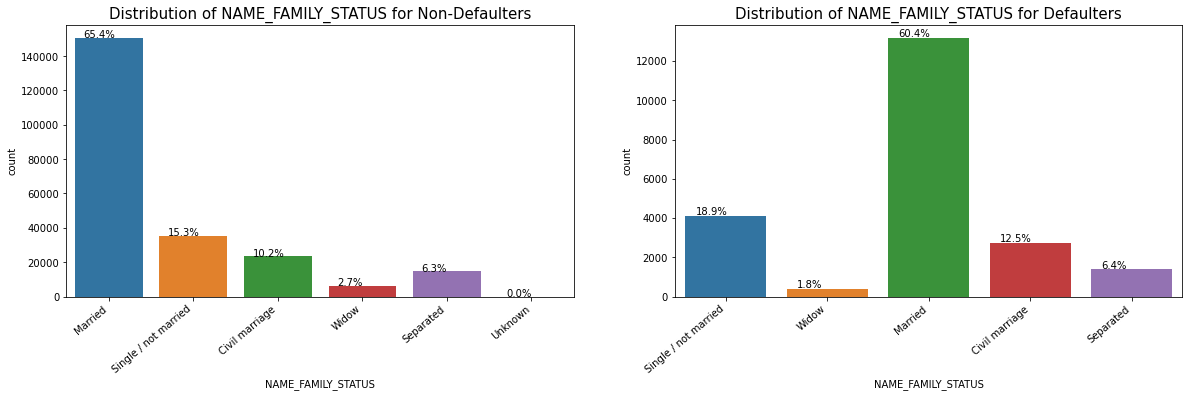

In [65]:
cat_plot('NAME_FAMILY_STATUS')

- Married people have applied for max number of loans.
- Single/not married people and people who have done civil marriage contribute to the defaulters more than the non defaulters and hence more risk is associated with them.

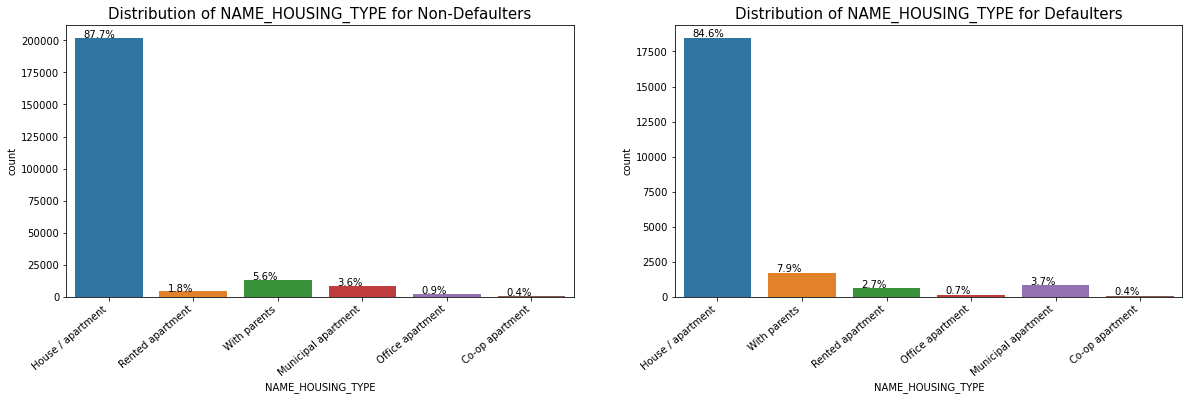

In [66]:
cat_plot('NAME_HOUSING_TYPE')

- It is evident from the graph that people who have House/Appartment, tend to apply for more loans.
- People living with parents tend to default more often when compared with others.The reason could be the increased expenses as their parents are living with them and therefore the family size increases and hence more risk is associated with them.

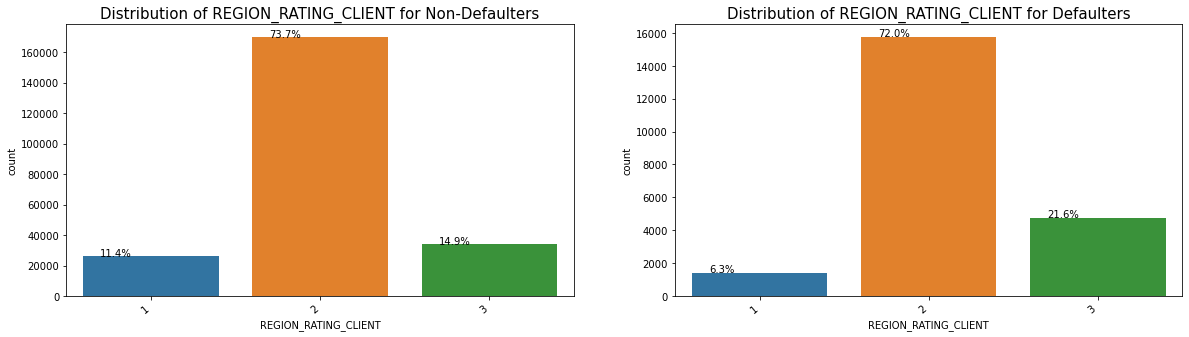

In [67]:
cat_plot('REGION_RATING_CLIENT')

- More people from second tier regions tend to apply for loans and hence more defaulters
- We can infer that people living in better areas(Rating 3) tend contribute more to the defaulters by their weightage
- People living in 1 rated areas are comparitively safest target audience

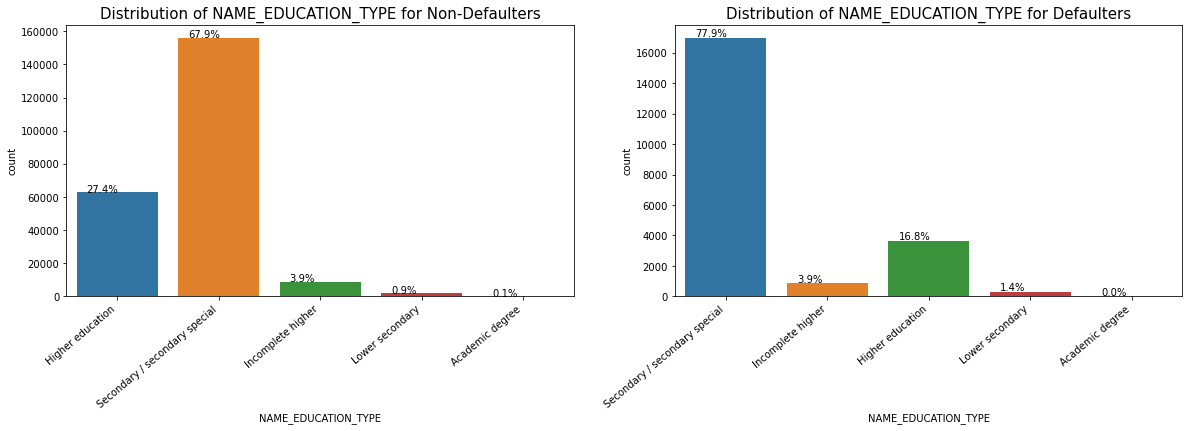

In [68]:
cat_plot('NAME_EDUCATION_TYPE')

- Higher educated ones are less likely to default probably due to better salaries and income due to education
- secondary educated people are more likely to default probably due to high number of applicants

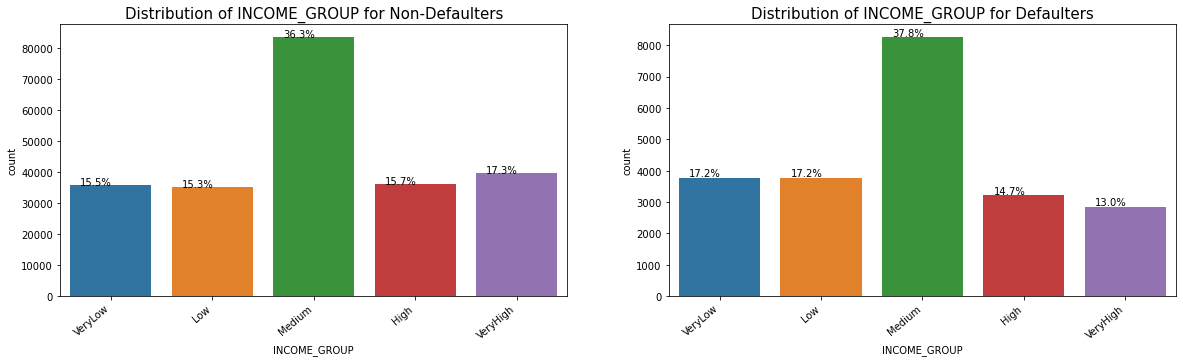

In [69]:
cat_plot('INCOME_GROUP')

- Very high income group is the safest as they default the least

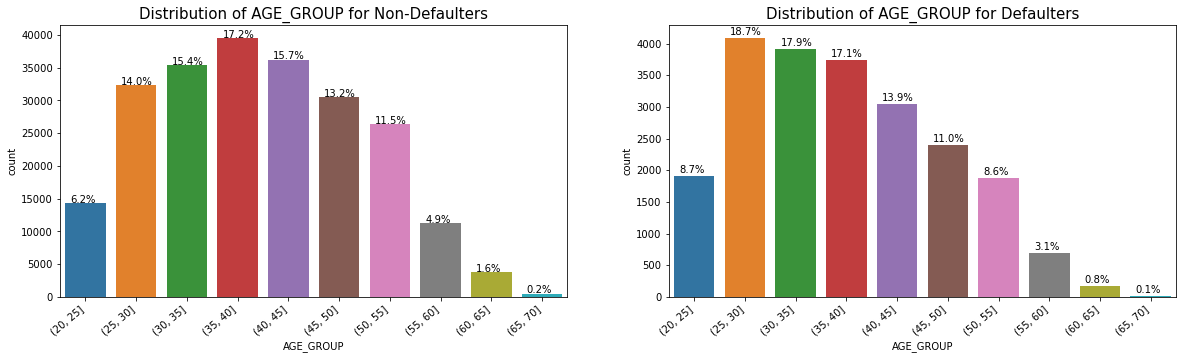

In [70]:
cat_plot('AGE_GROUP')

- We see that (25,30] age group tend to default more.
- With increasing age group, people tend to default less starting from the age 25. One of the reasons could be they complete their education and get employed around that age and with increasing age, their salary also increases.

In [71]:
# function to dist plot for continuous variables
def cont_plot(cont):
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot(a=app0[cont],ax=ax1)

    ax1.set_title(f'Distribution of {cont} for Non-Defaulters',fontsize=15)
            
    sns.distplot(a=app1[cont],ax=ax2)
    ax2.set_title(f'Distribution of {cont} for Defaulters',fontsize=15)    
        
    plt.show()

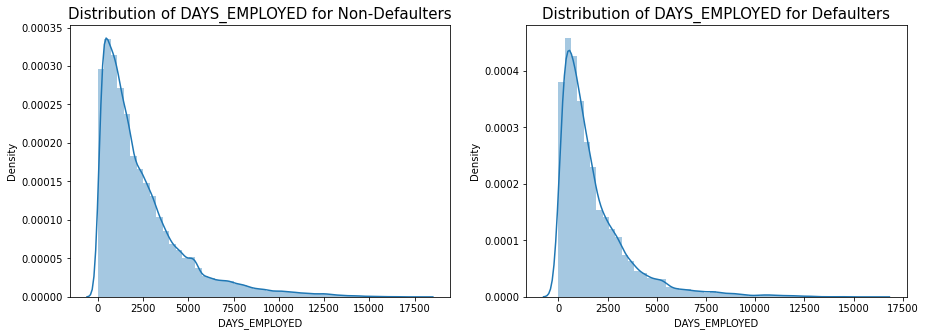

In [72]:
cont_plot('DAYS_EMPLOYED')

- From the above plotting, we can say that most of the population is employed for less than 5000 days i.e less than 13 years who are applying for loan and hence more number of defaulters in the same category.
- As the number of years of experience increase, they get better salaries/income and hence apply and default on loans less.

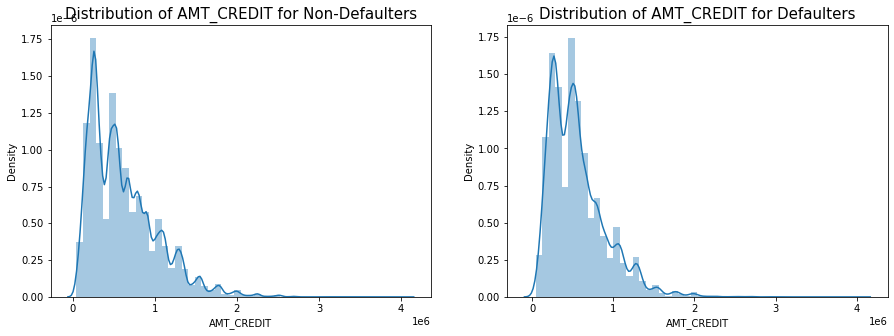

In [73]:
cont_plot('AMT_CREDIT')

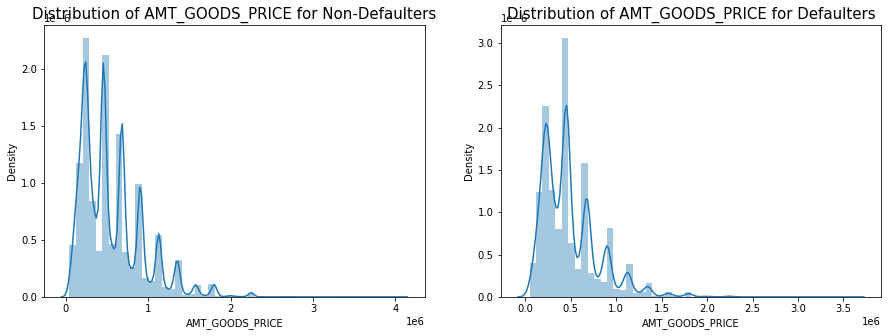

In [74]:
cont_plot('AMT_GOODS_PRICE')

- We can say that the AMT_CREDIT and AMT_GOODS_PRICE are fairly similar graphs
- If we try to understand the two variables, AMT_CREDIT is credit amount of loan and AMT_GOODS_PRICE is the price of the goods for which the loan is given for consumer loans
- Therefore, it makes sense that they look similar

In [75]:
#BIVARIATE ANALYSIS on AMT_CREDIT and AMT_GOODS_PRICE
def plot(x,y):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x, y,data=app0,ax=ax1)
    ax1.set_xlabel(x)    
    ax1.set_ylabel(y)
    ax1.set_title(f'{x} vs {y} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x, y,data=app1,ax=ax2)
    ax2.set_xlabel(x)    
    ax2.set_ylabel(y)
    ax2.set_title(f'{x} vs {y} for Defaulters',fontsize=15)
            
    plt.show()


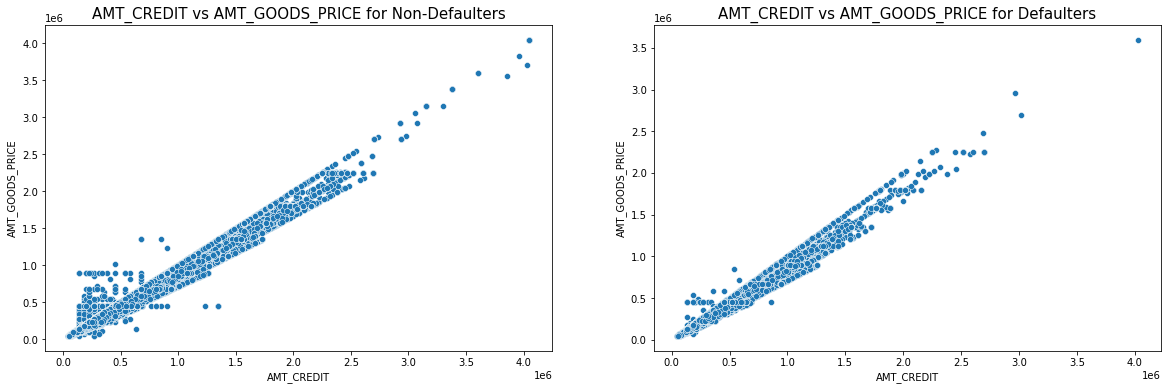

In [76]:
plot('AMT_CREDIT', 'AMT_GOODS_PRICE')

- We can clearly see that they are linearly scattered

In [77]:
applications_final['CNT_FAM_MEMBERS'].value_counts()

2.0     123330
3.0      51467
1.0      49049
4.0      24360
5.0       3417
6.0        396
7.0         78
8.0         19
9.0          6
10.0         3
14.0         2
20.0         2
12.0         2
16.0         1
13.0         1
11.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

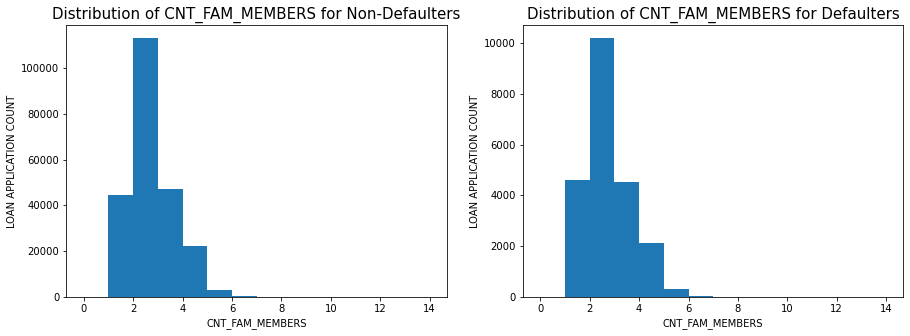

In [78]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
app0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
app1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

- Maximum number of applicants have family size of 2 to 4 members
- And hence the maximum loan defaults

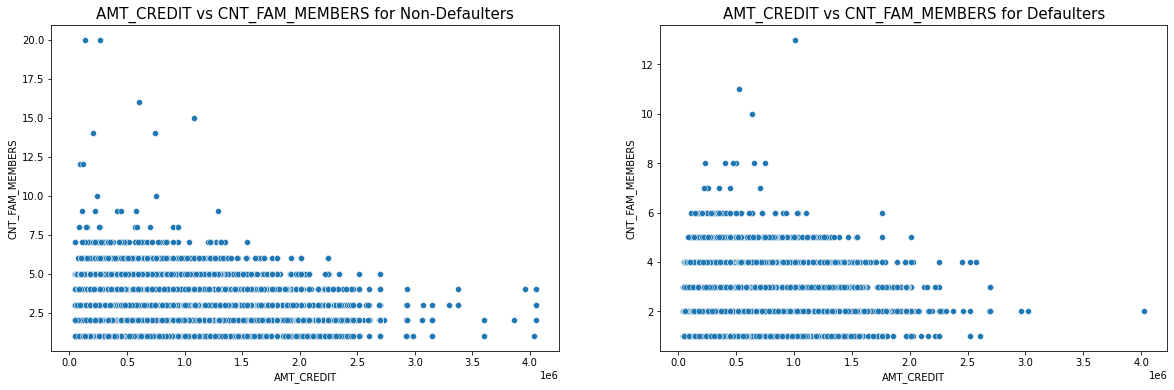

In [79]:
plot('AMT_CREDIT','CNT_FAM_MEMBERS')

- We can see that the density in the lower left corner is similar in both the case, so the people are equally likely to default if the family is small and the AMT_CREDIT is low. 
- We can observe that larger families and people with larger AMT_CREDIT default less often

In [80]:
####### PREVIOUS APPLICATIONS ########

In [81]:
prev_applications.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [82]:
prev_applications.shape

(1670214, 37)

In [83]:
prev_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [84]:
prev_applications.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [85]:
round(100*(prev_applications.isnull().sum()/prev_applications.index.size), 2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [86]:
# number of columns having 50% or more empty rows = 4
empty = round(100*(prev_applications.isnull().sum()/prev_applications.index.size), 2) >=50.00
empty.value_counts()

False    33
True      4
dtype: int64

In [87]:
#dropping these 4 columns
drop_columns = list(prev_applications.columns[empty])
prev_applications.drop(drop_columns, axis=1, inplace=True)

In [88]:
prev_applications.shape

(1670214, 33)

In [89]:
prev_applications.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1 

In [90]:
#UNIVARIATE ANALYSIS

In [91]:
# function to count plot for categorical variables
def prev_cat_plot(cat):

    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=cat, data=prev_applications,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {cat}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

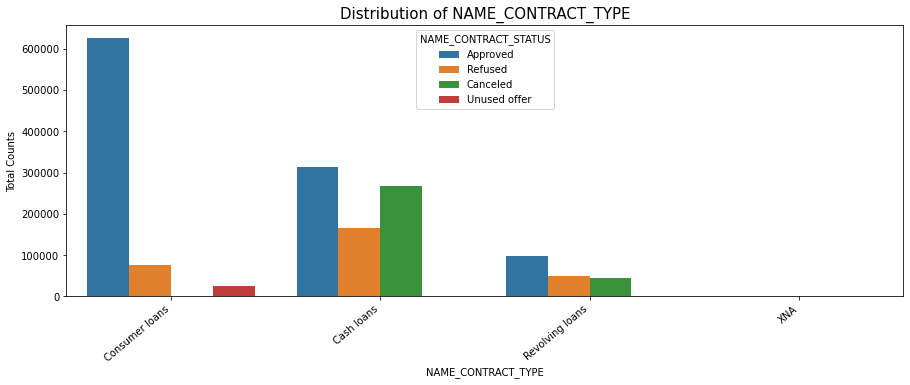

In [92]:
prev_cat_plot('NAME_CONTRACT_TYPE')

- We can see that max number of applications were for consumer loans and cash loans.
- Also, cash loans were refused the most and consumer loans were approved the most.

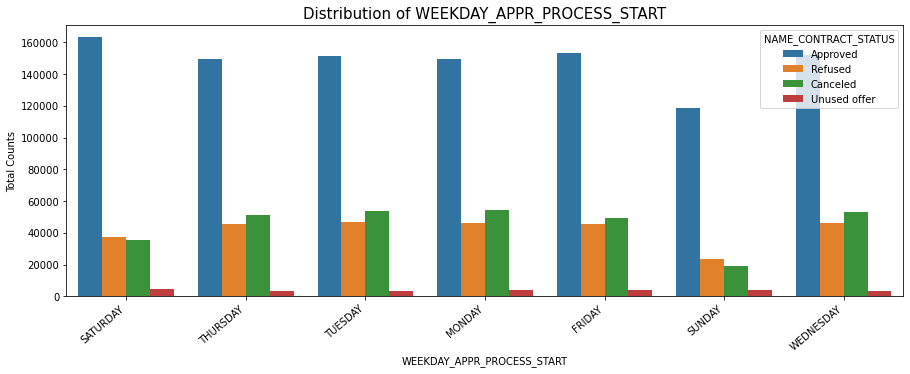

In [93]:
prev_cat_plot('WEEKDAY_APPR_PROCESS_START')

- It is very weird that the loans were approved/rejected on weekends as well especially Sunday.
- Also, the distribution is kind of spread equally over the week with exception of saturday(high) and sunday(low)

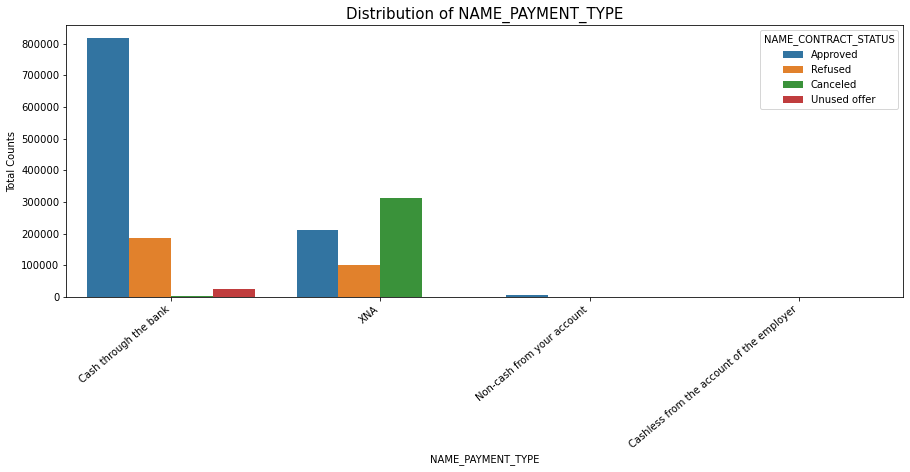

In [94]:
prev_cat_plot('NAME_PAYMENT_TYPE')

- From the above chart, we can infer that most of the clients chose to repay the loan using the 'Cash through the bank' option
- We can also see that 'Non-Cash from your account' & 'Cashless from the account of the employee' options are not at all popular in terms of loan repayment amongst the customers.

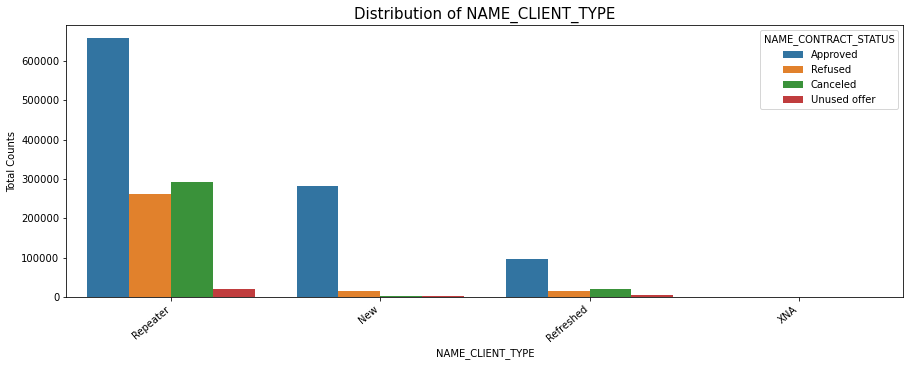

In [95]:
prev_cat_plot('NAME_CLIENT_TYPE')

- Out of the total applications 70% of customers are repeaters. They also get refused most often.
- We need to capture more new clients.

In [96]:
#BI-VARIATE ANALYSIS

In [97]:
## continuous variables

<Figure size 1440x576 with 0 Axes>

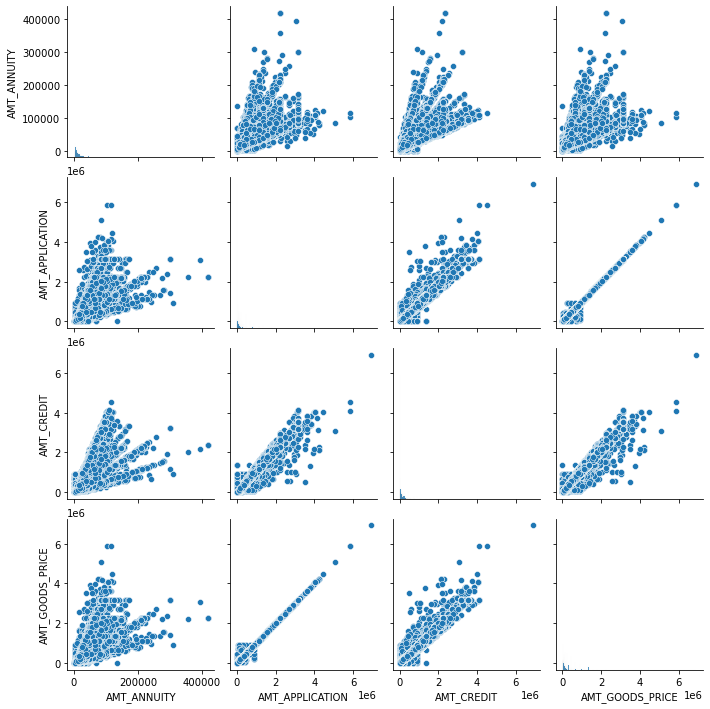

In [98]:
plt.figure(figsize=[20,8])
sns.pairplot(prev_applications[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']])
plt.show()

- Annuity of previous application has a very high and positive influence over:
    - How much credit did client asked on the previous application
    - Final credit amount on the previous application that was approved by the bank
    - Goods price of good that client asked for on the previous application.

- For how much credit did client ask on the previous application is highly influenced by the Goods price of good that client has asked for on the previous application

- Final credit amount disbursed to the customer previously, after approval is highly influence by the application amount and also the goods price of good that client asked for on the previous application.

In [99]:
## categorical vs continuous

In [100]:
def cat_vs_cont(cat, cont):

    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxplot(x=cat,y = cont, data=prev_applications)
    ax.set_ylabel(f'{cont}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} Vs {cont}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

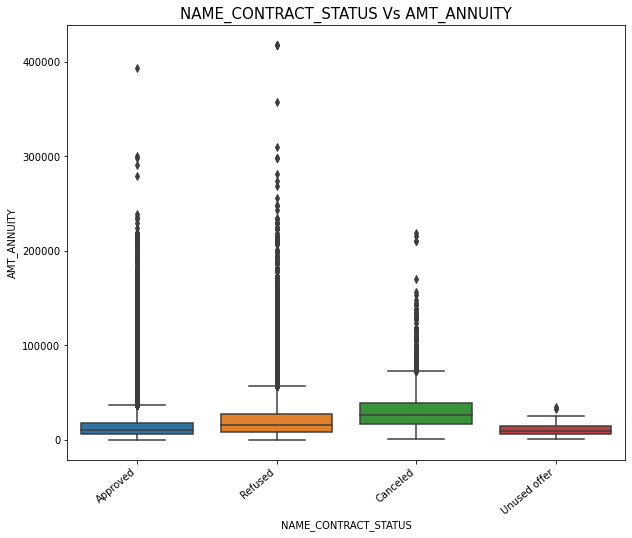

In [101]:
cat_vs_cont('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

- From the above plot we can see that loan application for people with lower AMT_ANNUITY gets canceled or Unused most of the time.
- We also see that applications with too high AMT ANNUITY also got refused more often than others.

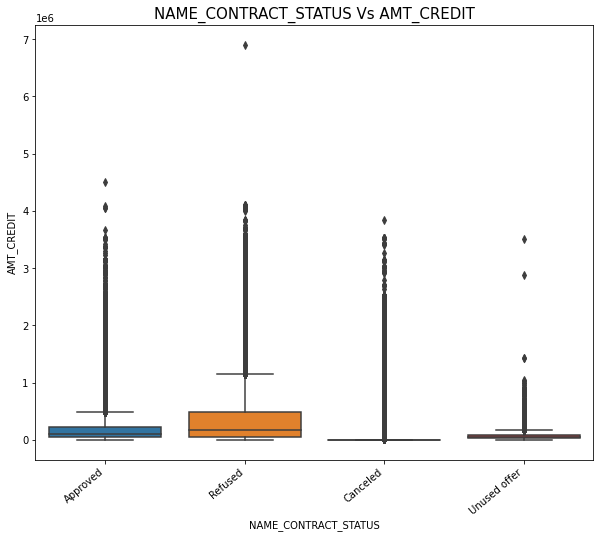

In [102]:
cat_vs_cont('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

- We can infer that when the AMT_CREDIT is too low, it get's cancelled/unused most of the time.

In [103]:
###### MERGING THE DATASETS #######

In [104]:
final = pd.merge(applications_final, prev_applications, how='left', on=['SK_ID_CURR'])

In [105]:
final.shape

(1153787, 61)

In [106]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153787 entries, 0 to 1153786
Data columns (total 61 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1153787 non-null  int64   
 1   TARGET                       1153787 non-null  int64   
 2   CODE_GENDER                  1153787 non-null  object  
 3   FLAG_OWN_CAR                 1153787 non-null  object  
 4   FLAG_OWN_REALTY              1153787 non-null  object  
 5   AMT_CREDIT_x                 1153787 non-null  float64 
 6   AMT_INCOME_TOTAL             1153787 non-null  float64 
 7   NAME_INCOME_TYPE             1153787 non-null  object  
 8   NAME_EDUCATION_TYPE          1153787 non-null  object  
 9   NAME_FAMILY_STATUS           1153787 non-null  object  
 10  NAME_HOUSING_TYPE            1153787 non-null  object  
 11  DAYS_BIRTH                   1153787 non-null  int64   
 12  DAYS_EMPLOYED               

In [107]:
final.describe()

SK_ID_CURR        TARGET  AMT_CREDIT_x  AMT_INCOME_TOTAL  \
count  1.153787e+06  1.153787e+06  1.153787e+06      1.153787e+06   
mean   2.784233e+05  9.288456e-02  6.010612e+05      1.802120e+05   
std    1.028203e+05  2.902707e-01  3.886951e+05      2.170783e+05   
min    1.000020e+05  0.000000e+00  4.500000e+04      2.565000e+04   
25%    1.892690e+05  0.000000e+00  2.844000e+05      1.125000e+05   
50%    2.787820e+05  0.000000e+00  5.212800e+05      1.575000e+05   
75%    3.675660e+05  0.000000e+00  8.100000e+05      2.250000e+05   
max    4.562550e+05  1.000000e+00  4.050000e+06      1.170000e+08   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION    FLAG_EMAIL  \
count  1.153787e+06   1.153787e+06       1.153787e+06  1.153787e+06   
mean   1.497762e+04   2.452672e+03      -4.636836e+03  8.081908e-02   
std    3.636710e+03   2.315895e+03       3.275291e+03  2.725572e-01   
min    7.489000e+03   0.000000e+00      -2.292800e+04  0.000000e+00   
25%    1.200500e+04   8.400000e+02      -6.966000e+03  0.000000e+00   
50%    1.479100e+04   1.755000e+03      -4.256000e+03  0.000000e+00   
75%    1.771100e+04   3.254000e+03      -1.827000e+03  0.000000e+00   
max    2.520000e+04   1.791200e+04       0.000000e+00  1.000000e+00   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY  AMT_ANNUITY_x  \
count     1.153785e+06                 1.153787e+06   1.153694e+06   
mean      2.258713e+00                 2.029241e+00   2.779028e+04   
std       9.324105e-01                 4.930659e-01   1.411839e+04   
min       1.000000e+00                 1.000000e+00   1.980000e+03   
25%       2.000000e+00                 2.000000e+00   1.744650e+04   
50%       2.000000e+00                 2.000000e+00   2.596050e+04   
75%       3.000000e+00                 2.000000e+00   3.555450e+04   
max       2.000000e+01                 3.000000e+00   2.580255e+05   

       REGION_RATING_CLIENT  AMT_GOODS_PRICE_x           AGE    SK_ID_PREV  \
count          1.153787e+06       1.153787e+06  1.153787e+06  1.140118e+06   
mean           2.051737e+00       5.396857e+05  4.053395e+01  1.922484e+06   
std            4.998441e-01       3.568798e+05  9.963400e+00  5.326710e+05   
min            1.000000e+00       4.050000e+04  2.000000e+01  1.000001e+06   
25%            2.000000e+00       2.475000e+05  3.200000e+01  1.461178e+06   
50%            2.000000e+00       4.500000e+05  4.000000e+01  1.922130e+06   
75%            2.000000e+00       6.885000e+05  4.800000e+01  2.383615e+06   
max            3.000000e+00       4.050000e+06  6.900000e+01  2.845381e+06   

       AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  \
count  896395.000000     1.140118e+06  1.140118e+06       8.876520e+05   
mean    15871.655683     1.737888e+05  1.956659e+05       2.232550e+05   
std     14995.310848     2.967152e+05  3.229700e+05       3.194728e+05   
min         0.000000     0.000000e+00  0.000000e+00       0.000000e+00   
25%      6135.075000     2.065500e+04  2.578050e+04       4.806000e+04   
50%     11071.755000     6.880050e+04  7.863750e+04       1.049400e+05   
75%     20468.317500     1.800000e+05  2.047264e+05       2.250000e+05   
max    418058.145000     5.850000e+06  4.509688e+06       5.850000e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  \
count             1.140118e+06            1.140118e+06   1.140118e+06   
mean              1.265568e+01            9.963442e-01  -8.858701e+02   
std               3.359873e+00            6.035230e-02   7.834204e+02   
min               0.000000e+00            0.000000e+00  -2.922000e+03   
25%               1.000000e+01            1.000000e+00  -1.322000e+03   
50%               1.300000e+01            1.000000e+00  -5.910000e+02   
75%               1.500000e+01            1.000000e+00  -2.760000e+02   
max               2.300000e+01            1.000000e+00  -1.000000e+00   

       SELLERPLACE_AREA    CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count     

In [108]:
round(100*(final.isnull().sum()/final.index.size), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
AMT_CREDIT_x                    0.00
AMT_INCOME_TOTAL                0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
FLAG_EMAIL                      0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT_W_CITY     0.00
ORGANIZATION_TYPE               0.00
AMT_REQ_CREDIT_BUREAU_DAY       0.00
AMT_REQ_CREDIT_BUREAU_MON       0.00
AMT_REQ_CREDIT_BUREAU_QRT       0.00
NAME_CONTRACT_TYPE_x            0.00
AMT_ANNUITY_x                   0.01
REGION_RATING_CLIENT            0.00
AMT_GOODS_PRICE_x               0.00
INCOME_GROUP                    0.00
A

In [109]:
# number of columns having 40% or more empty rows = 7
empty = round(100*(final.isnull().sum()/final.index.size), 2) >=40.00
empty.value_counts()

False    54
True      7
dtype: int64

In [110]:
#dropping these 4 columns
drop_columns = list(final.columns[empty])
final.drop(drop_columns, axis=1, inplace=True)

In [111]:
final.shape

(1153787, 54)

In [112]:
def final_plot(x,y):
   
    New = final.pivot_table(values='SK_ID_CURR', index=x, columns=y, aggfunc='count')
    New = New.div(New.sum(axis=1),axis='rows')*100
    New.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {x} on Loan Approval')
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}%')
    plt.show()

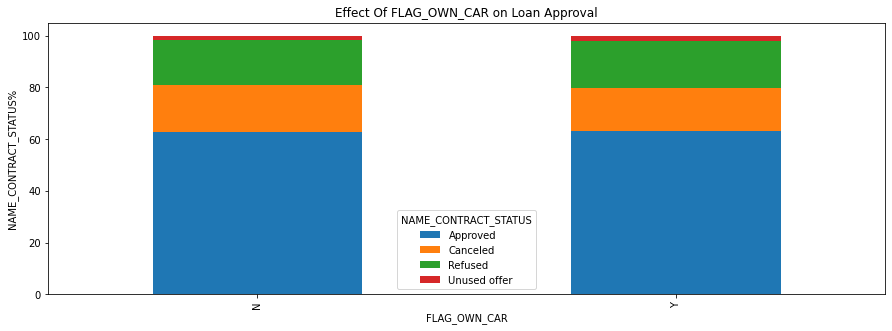

In [113]:
final_plot('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

- We see that car ownership doesn't have any effect on application approval or rejection.
- We saw earlier that the people who has a car has lesser chances of default.
- It is genrally observed that people who have a car are more well off.
- The bank can add more weightage to car ownership while approving a loan amount

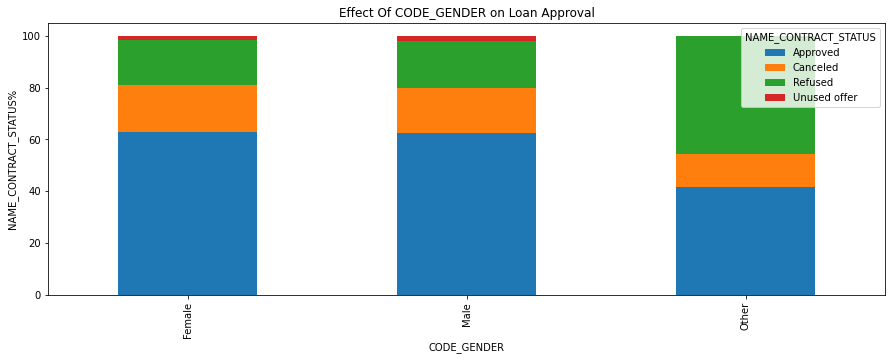

In [114]:
final_plot('CODE_GENDER','NAME_CONTRACT_STATUS')

- We see that code gender doesn't have any effect on application approval or rejection.
- We saw earlier that female have lesser chances of default compared to males.
- The bank can add more weightage to female while approving a loan amount.

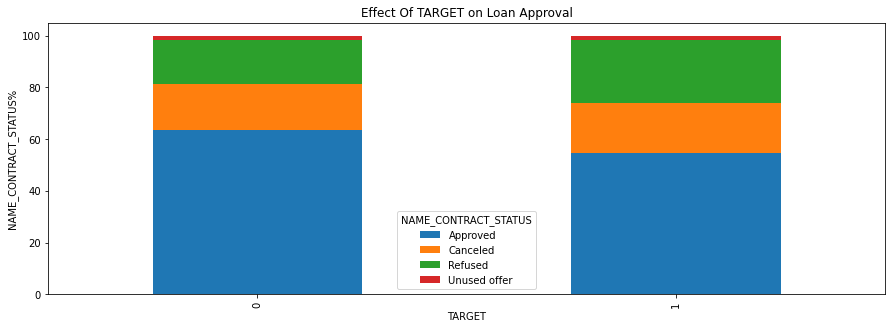

In [115]:
final_plot('TARGET','NAME_CONTRACT_STATUS')

- We can see that the people who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have higher chances of defaulting.
- For target, 0 = non defaulter and 1 = defaulter

In [116]:
### END ###